## 學習目標

### 1. 雙月亮資料集
觀察不同演算法的決策邊界差異性，並利用此資料集來快速認識Scikit-Learn。


### 2. 手寫數字資料集

介紹完整的機器學習流程，包含
   * 資料準備
   * 標準化
   * 模型建立
   * 調整參數優化模型
   * 模型檢驗

---

## 索引

### [1.雙月亮](#1.-雙月亮)

[1.a. 資料準備](#1.a.-資料準備)

[1.b. 資料標準化](#1.b.-資料標準化)

[1.c. 模型建立](#1.c.-模型建立)
* [1.c.I. KNN](#1.c.I.-KNN)
* [1.c.II. Linear SVM](#1.c.II.-Linear-SVM)
* [1.c.III. SVM with Gaussian Kernel](#1.c.III.-SVM-with-Gaussian-Kernel)
* [1.c.IV. Logistic Regression](#1.c.IV.-Logistic-Regression)

### [2.手寫數字](#2.-手寫數字)
[2.a. 利用Pandas, 可迅速了解每個資料夾裡面有幾張圖片](#2.a.-利用Pandas,-可迅速了解每個資料夾裡面有幾張圖片)

[2.b. 將圖片路徑資訊分成70% train, 10% val, 20% test](#2.b.-將圖片路徑資訊分成70%-train,-10%-val,-20%-test)

[2.c. 將圖片載入，存成數值矩陣](#2.c.-將圖片載入，存成數值矩陣)

[2.d. 將28X28的圖片特徵轉換成一維](#2.d.-將28X28的圖片特徵轉換成一維)

[2.e. 以羅吉斯回歸建立分類模型](#2.e.-以羅吉斯回歸建立分類模型)

[2.f. 製作分類結果報告，並畫出混淆矩陣](#2.f.-製作分類結果報告，並畫出混淆矩陣)

[2.g. 建模: 資料分成train, validation, test三份](#2.g.-建模:-資料分成train,-validation,-test三份)
   * [2.g.I. 以train data來建立模型，並將該模型以validation data 來檢驗，藉此優化模型參數](#2.g.I.-以train-data來建立模型，並將該模型以validation-data-來檢驗，藉此優化模型參數)
   * [2.g.II. 將模型內的權重視覺化](#2.g.II.-將模型內的權重視覺化)
   * [2.g.III. 以test data來確定建立好的模型是否完善](#2.g.III.-以test-data來確定建立好的模型是否完善)

[2.h. 另一種更嚴謹的建模方式：k-fold cross validation](#2.h.-另一種更嚴謹的建模方式：k-fold-cross-validation)
   * [2.h.I. 以5-fold 交叉驗證來調整模型參數: 使用GridSearchCV](#2.h.I.-以5-fold-交叉驗證來調整模型參數:-使用GridSearchCV)
   * [2.h.II. 看哪種參數組合有最高的f1 score](#2.h.II.-看哪種參數組合有最高的f1-score)
   * [2.h.III. 最後，拿最好的模型，去看該模型是否亦適用於test data](#2.h.III.-最後，拿最好的模型，去看該模型是否亦適用於test-data)

---

[問題1.](#問題1.)
[問題2.](#問題2.)
[問題3.](#問題3.)

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import sklearn
import os

# 1. 雙月亮

### 1.a. 資料準備

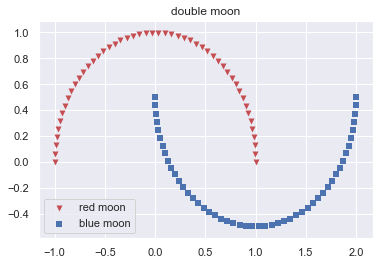

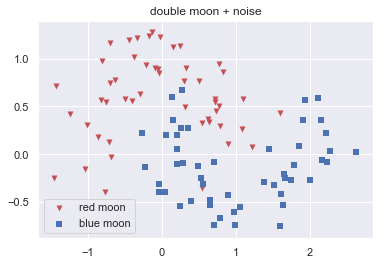

In [3]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100)
colors=['r','b']

#畫兩個月亮
moonRed=plt.scatter(X[y==0,0],X[y==0,1],marker='v', color=colors[0],lw=0,label="red moon")
moonBLue=plt.scatter(X[y==1,0],X[y==1,1],marker='s', color=colors[1],lw=0,label="blue moon")
plt.legend([moonRed, moonBLue],["red moon","blue moon"],scatterpoints=1,loc='lower left')
plt.title('double moon')
plt.show()

#畫兩個月亮+雜訊
variance=0.25
randMatrix=np.hstack((np.random.normal(0,variance,100).reshape(-1,1),
                      np.random.normal(0,variance,100).reshape(-1,1)))
X=(randMatrix+X)

moonRed=plt.scatter(X[y==0,0],X[y==0,1],marker='v', color=colors[0],lw=0,label="red moon")
moonBLue=plt.scatter(X[y==1,0],X[y==1,1],marker='s', color=colors[1],lw=0,label="blue moon")
plt.title('double moon + noise')
plt.legend([moonRed, moonBLue],["red moon","blue moon"],scatterpoints=1,loc='lower left')
plt.show()

[回索引](#索引)

### 1.b. 資料標準化

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
fitter=scaler.fit(X)
# fitter.mean_   # 看MEAN
# fitter.var_    # 看VARIANCE
X=fitter.transform(X)

# # 確定資料是否有標準化
print( 'mean=',X[:,0].mean(),'\t std=',X[:,0].std() )
print( 'mean=',X[:,1].mean(),'\t std=',X[:,1].std() )

mean= 4.618527782440651e-16 	 std= 1.0
mean= -8.881784197001253e-18 	 std= 0.9999999999999997


Q: 為何要做資料標準化？
    
Reference: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

[回索引](#索引)

### 1.c. 資料準備模型建立

#### 1.c.I. KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
model=classifier.fit(X,y)

註： data需要是shape=```(#examples,features)```

0 0.0
1 1.0


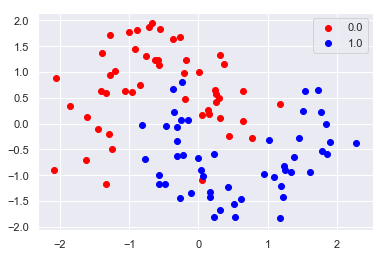

In [6]:
df=pd.DataFrame([X[:,0],X[:,1],y]).T
df.columns=["x1","x2",'label']
groups=df.groupby("label")
groups.indices
color=["red","blue"]
for idx,(name,group) in enumerate(groups):
    print(idx,name)
    plt.scatter(group["x1"],group["x2"],color=color[idx],label=name)
plt.legend()
plt.show()

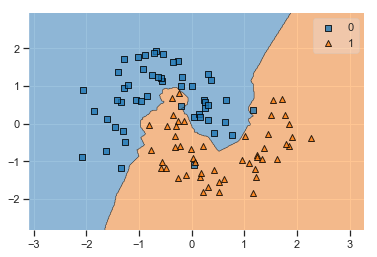

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
from mlxtend.plotting import plot_decision_regions
plt.figure()
plot_decision_regions(X,y,model)

[回索引](#索引)

#### 1.c.II. Linear SVM

http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

>Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

由Scikit-Learn說明，我們得知，於線性SVM時，LinearSVC相較於SVC來說，有較多參數可以調整，且於計算大量數據時應較為迅速。

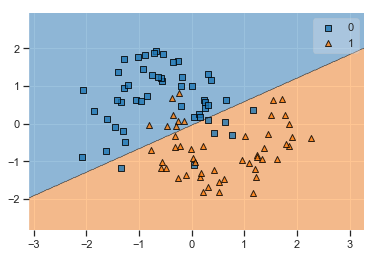

In [8]:
from sklearn.svm import LinearSVC
classifier=LinearSVC()
model=classifier.fit(X,y)

# Plot the decision boundary. For that, we will assign a color to each
from mlxtend.plotting import plot_decision_regions
plt.figure()
plot_decision_regions(X,y,model)
plt.show()

In [9]:
from sklearn.svm import LinearSVC
LinearSVC(penalty="l1")

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

#### 問題1. 
* multi_class='ovr'是什麼意思？
* l1/l2 penalty是什麼？

[回索引](#索引)

#### 1.c.III. SVM with Gaussian Kernel

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

SVC基於libsvm, libsvm是台灣大學林智仁所開發。

In [10]:
from sklearn.svm import SVC
classifier=SVC()

In [14]:
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

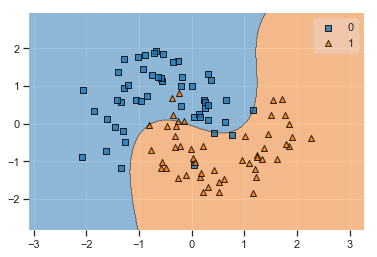

In [15]:
from sklearn.svm import SVC
classifier=SVC()
model=classifier.fit(X,y)

# Plot the decision boundary. For that, we will assign a color to each
from mlxtend.plotting import plot_decision_regions
plt.figure()
plot_decision_regions(X,y,classifier)
plt.show()

#### 問題2.

* kernel='rbf'是什麼意思？
* probability=True是什麼意思？

reference: https://stats.stackexchange.com/questions/63881/use-gaussian-rbf-kernel-for-mapping-of-2d-data-to-3d

[回索引](#索引)

#### 1.c.IV. Logistic Regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier=LogisticRegression()

model=classifier.fit(X,y)
# Plot the decision boundary. For that, we will assign a color to each
from mlxtend.plotting import plot_decision_regions
plt.figure()
plot_decision_regions(X,y,model)
plt.show()

In [ ]:
pred=model.predict(X)

In [ ]:
(y == pred).sum()/len(y)

In [ ]:
(pred==y).mean()

以上等同於：

In [ ]:
model.score(X,y)

In [ ]:
LogisticRegression()

#### 問題3. 
LogisticRegression()的參數中，multi_class的值有哪些可能性，分別有什麼意義？

Scikit-Learn API: http://scikit-learn.org/stable/

[回索引](#索引)

#  2. 手寫數字

In [ ]:
def filePathsGen(rootPath):
    paths=[]
    dirs=[]
    for dirPath,dirNames,fileNames in os.walk(rootPath):
        for fileName in fileNames:
            fullPath=os.path.join(dirPath,fileName)
            paths.append((int(dirPath[len(rootPath) ]),fullPath))
        dirs.append(dirNames)
    return dirs,paths

In [ ]:
dirs,paths=filePathsGen('../datasets/mnist/') #載入圖片路徑

In [ ]:
dfPath=pd.DataFrame(paths,columns=['class','path']) #圖片路徑存成Pandas資料表
dfPath.head(5) # 看資料表前5個row

[回索引](#索引)

### 2.a. 利用Pandas, 可迅速了解每個資料夾裡面有幾張圖片

In [ ]:
#依照class分群後，數各群的數量，並繪圖
dfCountPerClass=dfPath.groupby('class').count()
dfCountPerClass.rename(columns={'path':'amount of figures'},inplace=True)
dfCountPerClass.plot(kind='bar',rot=0)

[回索引](#索引)

###  2.b. 將圖片路徑資訊分成70% train, 10% val, 20% test

In [ ]:
import cv2

In [ ]:
dfPath.head(5) # 看前五筆資料

In [ ]:
# dfPath["class"] = dfPath["class"].astype(np.uint8) # 轉換該欄位的資料型態成為uint8

dfShuffled=dfPath.sample(frac=1)     # 打亂一下path data

dfFrac=dfShuffled.sample(frac=0.05)  # 以下範例，我們只取原資料集的5%來做使用，
                                     # 這是為了利於在課堂中快速演練。

## 將已經取了5%的資料拿70%當train, 10%當train_val, 20%當test。

In [ ]:
dfShuffled=dfPath.sample(frac=1)     # 打亂一下path data

dfFrac=dfShuffled.sample(frac=0.05)  # 以下範例，我們只取原資料集的5%來做使用，
                                     # 這是為了利於在課堂中快速演練。

train=dfFrac.sample(frac=0.8) # 將path data隨機取樣，80%的path data當train
test=dfFrac.drop(train.index) # 20%的path data當test

In [ ]:
60000*0.05 # 整體資料數

In [ ]:
60000*0.05 * 0.8 # 訓練資料數

In [ ]:
60000*0.05 * 0.2 # 測試資料數

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
# 接著，將訓練資料分割出一小部分，留作驗證(validation)用資料

trainVal=train.sample(frac=1/8)  # 將train再切1/8做驗證用資料, 存至trainVal
train=train.drop(trainVal.index) # 將train的7/8留著，丟去剛切出去的1/8

In [ ]:
60000*0.05 * 0.7 # 最終訓練資料數

In [ ]:
60000*0.05 * 0.1 # 最終驗證資料數

In [ ]:
print(train.shape)
print(trainVal.shape)
print(test.shape)

In [ ]:
#最終，整體資料拿70%當train, 10%當train_val, 20%當test。
print('shape(all figures)=\t\t',dfPath.shape)
print('shape(fraction of figures)=\t',dfFrac.shape)
print('shape(train)=\t\t\t',train.shape)
print('shape(trainVal)=\t\t',trainVal.shape)
print('shape(test)=\t\t\t',test.shape)

#隨便抓三張圖來看
for j in range(3):
    img=cv2.imread(train['path'].iloc[j])
    plt.imshow(img)
    plt.show()

[回索引](#索引)

###  2.c. 將圖片載入，存成數值矩陣

In [ ]:
import cv2

In [ ]:
def dataLoad(dfPath):
    paths=dfPath['path'].values
    x=np.zeros((len(paths),28,28) )

    for j in range(len(paths)):
        x[j,:,:]=cv2.imread(paths[j],0)/255
    y=dfPath['class'].values
    return x,y

In [ ]:
trainX,trainY=dataLoad(train)
trainValX,trainValY=dataLoad(trainVal)
testX,testY=dataLoad(test)

In [ ]:
print('train:\t',trainX.shape,trainY.shape)
print('trainVal:',trainValX.shape,trainValY.shape)
print('test:\t',testX.shape,testY.shape)

[回索引](#索引)

### 2.d. 將28X28的圖片特徵轉換成一維

In [ ]:
trainX=trainX.reshape(trainX.shape[0],-1)
trainValX=trainValX.reshape(trainValX.shape[0],-1)
testX=testX.reshape(testX.shape[0],-1)

In [ ]:
print('train:\t',trainX.shape,trainY.shape)
print('trainVal:',trainValX.shape,trainValY.shape)
print('test:\t',testX.shape,testY.shape)

[回索引](#索引)

### 2.e. 以Softmax回歸建立分類模型

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(C=1,multi_class='multinomial',solver='newton-cg')
model=lg.fit(trainX,trainY)

In [ ]:
predY=model.predict(trainValX)

將用(trainX,trainY)建立好的模型拿來預測，於(trainValX,trainValY)資料集的準確率

In [ ]:
(predY==trainValY).sum()/len(trainValY)

以上等同於利用model.score()計算：

In [ ]:
model.score(trainValX,trainValY)

[回索引](#索引)

### 2.f. 製作分類結果報告，並畫出混淆矩陣

In [ ]:
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
set(trainValY)

In [ ]:
print( classification_report(trainValY,predY) )

mat=confusion_matrix(trainValY,predY)
df_cm = pd.DataFrame(mat, index = [i for i in lg.classes_],
                  columns = [i for i in lg.classes_])
plt.figure(figsize = (10,10))
sns.heatmap(mat, annot=True)

[回索引](#索引)

### 2.g. 建模: 資料分成train, validation, test三份

以下為建模步驟
1. 設定好模型參數後，我們將利用train data來訓練模型。

2. 之後，我們將訓練好的模型，拿去檢驗validation data，看模型對於validation data是否有良好的預測結果。

3. 若否，則我們將調整模型參數，然後重複上述步驟。

4. 最終，我們了解到利用哪些參數可以取得最優模型。得到該最優模型後，我們最後以test data來確立該模型是否足夠完善。

#### 2.g.I. 以train data來建立模型，並將該模型以validation data 來檢驗，藉此優化模型參數

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression()

首先，選擇模型參數。

例如，調整$C$ (和penalty的強度成反比), 看$C$多大比較適合？

另外，順便測試看看$l1$和$l2$之中，哪個penalty比較好。

p.s. 

L1= Lasso

L2= Ridge

In [ ]:
cSpace=[0.01,0.1,1,10]
penalties=['l1','l2']

res=[]
for c in cSpace:
    for penalty in penalties:
        kwargs={'C':c,'penalty':penalty}
        print(kwargs)
        lg=LogisticRegression(**kwargs)
        lg=lg.fit(trainX,trainY)
        predY=lg.predict(trainValX)
        f1Score=f1_score(predY,trainValY,average='weighted')
        res.append((c,penalty,f1Score,lg))

將以各種不同參數訓練出來的模型和其f1值存至一個資料表

In [ ]:
df=pd.DataFrame(res,columns=['C','penalty','f1','classifier'])

In [ ]:
df

找出平均f1最高的參數設定

In [ ]:
dfSorted=df.sort_values('f1',ascending=False)

In [ ]:
dfSorted

[回索引](#索引)

In [ ]:
best_model=dfSorted["classifier"][0]

In [ ]:
best_model.coef_.shape

#### 2.g.II. 將模型內的權重視覺化

In [ ]:
def digitsWeightVisualizer(c,penalty,f1,classifier,digits):
    '''此方法用來視覺化模型內的權重。此方法目前僅適用數字資料集。'''
    coefAbs=np.abs(classifier.coef_.reshape(10,28,28)) # 將1維圖像特徵轉回2維
    s=sns.cubehelix_palette(light=1, as_cmap=True)     # 建立色票
    
    fig,axes=plt.subplots(2,2) #建立2X2圖組
    fig.set_dpi(100)           #設定該圖組解析度
    fig.set_size_inches(4,4)   #設定該圖組大小
    fig.suptitle('c= %s, penalty= %s, f1= %.3f'%(c,penalty,f1), y=1.05)
    
    for idx,j in enumerate(digits):
        ax=axes.reshape(-1)[idx]
        ax.set_title('digit=%s'%(j))
        sns.heatmap(coefAbs[j,:,:],ax=ax,square=True,cmap=s, vmin=0, vmax=1)
    plt.tight_layout()

In [ ]:
for j in range(5):
    digitsWeightVisualizer(*dfSorted.iloc[j,:],[1,2,3,4] )

由以上我們可看出

* l1能導致權重稀疏，將許多權重變成0。
* l2強度增加可減小權重大小。

以上兩種方式皆可防止overfitting。

[回索引](#索引)

#### 2.g.III. 以test data來確定建立好的模型是否完善

我們已經利用val data調整參數，得到了一個最好的模型。最後，將該模型用於預測test data，看模型是否也能針對test data有好的結果。

In [ ]:
predY=best_model.predict(testX)
print( classification_report(testY,predY) )

[回索引](#索引)

### 2.h. 另一種更嚴謹的建模方式：k-fold cross validation

將train data切五等分(5-fold)，分別以a,b,c,d,e表示。我們將訓練五個模型，每個模型分別取五等分資料中的四份做訓練(train)，剩下一份留做驗證(validation)。每個模型所取得的驗證部分不會重複。

|  模型  | 訓練資料 |驗證資料
|-------|----------|-----|
| 模型1  | a,b,c,d  | e  |
| 模型2  | a,b,c,e  | d  |
| 模型3  | a,b,d,e  | c  |
| 模型4  | a,c,d,e  | b  |
| 模型5  | b,c,d,e  | a  |

最後，這五個模型每一個都有其對應的驗證資料，我們可利用該資料來檢驗模型好壞，得出五個$f_1$值。將這五個$f_1$算平均($\bar{f_1}$)以及標準差($\sigma_{f_1}$)，可推估
$\hat{f_1}=\bar{f_1}\pm \sigma_{f_1}$。

[回索引](#索引)

#### 2.h.I. 以5-fold 交叉驗證來調整模型參數: 使用GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

cSpace=[0.01,0.1,1,10]
penalties=['l1','l2']
kwargs={'C':cSpace,'penalty':penalties}

clf = GridSearchCV(cv=5,estimator=LogisticRegression(), param_grid=kwargs,
                   n_jobs=-1,scoring='f1_weighted')
model=clf.fit(trainX,trainY)

In [ ]:
fake_data=np.random.normal(0,1,(2,784))

In [ ]:
model.best_estimator_.predict(fake_data)

In [ ]:
model.predict(fake_data) # 這一行和上面那一行是一樣的!

Q: ```model.predict```做了什麼事情? A: 見API: [按我打開連結](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.predict)

[回索引](#索引)

#### 2.h.II. 看哪種參數組合有最高的f1 score

In [ ]:
model.best_estimator_

In [ ]:
scoreMean=model.cv_results_['mean_test_score'] # 取得mean(f1)
scoreStd=model.cv_results_['std_test_score']   # 取得std(f1)

params=model.cv_results_['params']

#產生x座標軸上各ticks的標籤
xTickLabels=['('+str(param['penalty'])+','+str(param['C']) +')' for param in params]

fig,ax=plt.subplots(figsize=(10,4),dpi=100)

#將各f1畫成長條圖
ax.bar(np.arange(8), scoreMean, yerr=scoreStd)
ax.set_xticks(np.arange(8))
ax.set_xticklabels(xTickLabels)
ax.set_ylabel('f1 score')
ax.set_xlabel('parameter set, i.e. (penalty, C)')
plt.show()

模型最佳參數為何？

In [ ]:
model.best_params_

[回索引](#索引)

#### 2.h.III. 最後，拿最好的模型，去看該模型是否亦適用於test data。

In [ ]:
predY=model.best_estimator_.predict(testX)
print( classification_report(testY,predY) )

[回索引](#索引)